In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

In [2]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


**PHASE 1**

**DATA INGESTION**

In [3]:
RetailData_df = pd.read_excel("RetailData.xlsx")

In [4]:
RetailData_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
RetailData_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
RetailData_df.shape

(541909, 8)

In [7]:
RetailData_df.describe

<bound method NDFrame.describe of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cu

In [8]:
RetailData_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
# Converting the invoiceDate column to datetime format

RetailData_df['InvoiceDate'] = pd.to_datetime(RetailData_df['InvoiceDate'])

**PHASE 2**

**DATA STORAGE(SQL layer)**

In [ ]:
# database connection setup
database_url = os.getenv("DATABASE_URL")

In [ ]:
# loading environment variables from .env file
load_dotenv()

True

In [ ]:
# Creating a database engine
engine = create_engine(database_url)

In [ ]:
# Loading data into the PostgreSQL database
RetailData_df.to_sql('RetailData', engine, if_exists='append', index=False, schema='retail_data')

909

**PHASE 3**

**DATA PREPARATION (CLEANING & TRANSFORMATION)**

In [15]:
import pandas as pd  # data reading and manipulation
from sqlalchemy import create_engine # database connection and querying
import os  # avoid hardcoding file paths
from dotenv import load_dotenv  # load environment variables from .env file

In [16]:
load_dotenv()

True

In [18]:
r_query = '''SELECT *
FROM retail_data."RetailData";'''

In [20]:
RetailData_df = pd.read_sql(r_query, con=engine)

In [23]:
RetailData_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# 1. Quantity validation
# Any quantity less than 1 is invalid
invalid_qty = RetailData_df[RetailData_df['Quantity'] < 1]
print("Invalid Quantity transactions:")
print(invalid_qty.head())

Invalid Quantity transactions:
    InvoiceNo StockCode                       Description  Quantity  \
142   C536379         D                          Discount        -1   
155   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
236   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
237   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
238   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
142 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
155 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
236 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
238 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  


In [26]:
# Filtering out invalid transactions
valid_qty = RetailData_df[RetailData_df['Quantity'] >= 1].copy()

print("\nRows BEFORE filtering:", len(RetailData_df))
print("Rows AFTER filtering:", len(valid_qty))



Rows BEFORE filtering: 541909
Rows AFTER filtering: 531285


In [27]:
# 2. Unit Price validation
# Any unit price less than or equal to 0 is invalid
invalid_price = RetailData_df[RetailData_df['UnitPrice'] <= 0]

print("Invalid (negative) unit price transactions:")
print(invalid_price.head())


Invalid (negative) unit price transactions:
     InvoiceNo StockCode Description  Quantity         InvoiceDate  UnitPrice  \
623     536414     22139        None        56 2010-12-01 11:52:00        0.0   
1975    536545     21134        None         1 2010-12-01 14:32:00        0.0   
1976    536546     22145        None         1 2010-12-01 14:33:00        0.0   
1977    536547     37509        None         1 2010-12-01 14:33:00        0.0   
1992    536549    85226A        None         1 2010-12-01 14:34:00        0.0   

      CustomerID         Country  
623          NaN  United Kingdom  
1975         NaN  United Kingdom  
1976         NaN  United Kingdom  
1977         NaN  United Kingdom  
1992         NaN  United Kingdom  


In [29]:
# Filter out invalid unit price transactions
RetailData_df_valid_price = RetailData_df[RetailData_df['UnitPrice'] > 0]

print("\nRows BEFORE filtering invalid prices:", len(RetailData_df))
print("Rows AFTER filtering invalid prices:", len(RetailData_df_valid_price))


Rows BEFORE filtering invalid prices: 541909
Rows AFTER filtering invalid prices: 539392


In [30]:
# 3. Additional cleaning
# Remove invoice cancellations (InvoiceNo beginning with 'C').
RetailData_df = RetailData_df[~RetailData_df['InvoiceNo'].astype(str).str.startswith('C')]
print("After removing cancellations:", len(RetailData_df))

After removing cancellations: 532621


In [31]:
# Drop rows where CustomerID is missing
RetailData_df = RetailData_df.dropna(subset=['CustomerID'])
print("After dropping missing CustomerID:", len(RetailData_df))

After dropping missing CustomerID: 397924


In [32]:
# Removing Duplicate records
RetailData_df = RetailData_df.drop_duplicates()
print("After removing duplicates:", len(RetailData_df))

After removing duplicates: 392732


In [51]:
#  create new fileds
# Revenue = Quantity * UnitPrice
# Month, Day, Year extracted from InvoiceDate

#Computing the revenue
RetailData_df['Revenue'] = RetailData_df['Quantity'] * RetailData_df['UnitPrice']

In [49]:
# Extracting the date parts

RetailData_df['Day'] = RetailData_df['InvoiceDate'].dt.day  
RetailData_df['Month'] = RetailData_df['InvoiceDate'].dt.month
RetailData_df['Year'] = RetailData_df['InvoiceDate'].dt.year

print("New fields added: Revenue, Day, Month, Year")

New fields added: Revenue, Day, Month, Year


In [52]:
# Store a cleaned version of the data back into the database
RetailData_df.to_sql('RetailData_Cleaned', engine, if_exists='replace', index=False, schema='retail_data')

732

**PHASE 4**

**DATA ANALYSIS**

1. Time Series (2011 Revenue by Month)

In [ ]:
pip install matplotlib seaborn

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
r2_query = '''SELECT *
FROM retail_data."RetailData_Cleaned";'''

In [55]:
# loading cleaned data
RetailData_df = pd.read_sql(r2_query, con=engine)

In [56]:
# Ensure 'InvoiceDate' is in datetime format
RetailData_df['InvoiceDate'] = pd.to_datetime(RetailData_df['InvoiceDate'])

In [57]:
# Filtering for year 2011 only
RetailData_2011 = RetailData_df[RetailData_df['InvoiceDate'].dt.year == 2011]

print("Rows for 2011:", len(RetailData_2011))

Rows for 2011: 367059


In [58]:
# Grouping by Month to get total revenue
Monthly_Revenue = (
    RetailData_2011.groupby(RetailData_2011['InvoiceDate'].dt.month)['Revenue']
    .sum()
    .reset_index()
    .rename(columns={'InvoiceDate': 'Month', 'Revenue': 'TotalRevenue'})
)    
Monthly_Revenue

,Month,TotalRevenue
0,1,568101.310
1,2,446084.920
2,3,594081.760
3,4,468374.331
4,5,677355.150
5,6,660046.050
6,7,598962.901
7,8,644051.040
8,9,950690.202
9,10,1035642.450


**Plotting 2011 Monthly Revenue**

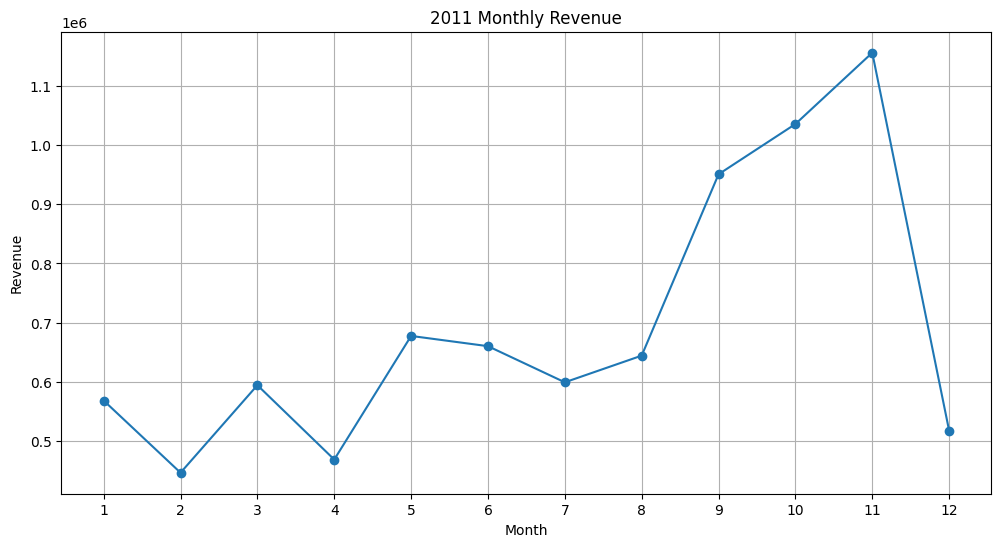

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(Monthly_Revenue['Month'], Monthly_Revenue['TotalRevenue'], marker='o')

plt.title('2011 Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(range(1, 13))


plt.show()

**2. Country performance (Excluding United Kingdom)**

In [65]:
# Excluding the United Kingdom from the dataset
RetailData_no_UK = RetailData_df[RetailData_df['Country'] != 'United Kingdom']
print("Rows after excluding UK:", len(RetailData_no_UK))

Rows after excluding UK: 43505


In [66]:
# Group by country: Revenue + Quantity
Country_Performance = (
    RetailData_no_UK.groupby('Country')
    .agg(
        Total_Revenue = ('Revenue', 'sum'),
        Total_Quantity = ('Quantity', 'sum')
    )
    .reset_index()
)

In [68]:
# Ranking countries by revenue
Country_Performance = Country_Performance.sort_values(by='Total_Revenue', ascending=False).head(10)

Country_Performance

,Country,Total_Revenue,Total_Quantity
23,Netherlands,285446.34,200937
10,EIRE,265262.46,140383
14,Germany,228678.40,119156
13,France,208934.31,111429
0,Australia,138453.81,84199
30,Spain,61558.56,27944
32,Switzerland,56443.95,30083
3,Belgium,41196.34,23237
31,Sweden,38367.83,36078
19,Japan,37416.37,26016


**3. Top Customers by Revenue**

In [70]:
# Ranking Customers by Revenue
customer_revenue = (
    RetailData_df.groupby('CustomerID')
    .agg(Total_Revenue = ('Revenue', 'sum'))
    .reset_index()
)

In [71]:
# Getting top 10 customers

top_customers = customer_revenue.sort_values(
    by='Total_Revenue',
     ascending=False
).head(10)

top_customers

,CustomerID,Total_Revenue
1690,14646.0,280206.02
4202,18102.0,259657.30
3729,17450.0,194390.79
3009,16446.0,168472.50
1880,14911.0,143711.17
55,12415.0,124914.53
1334,14156.0,117210.08
3772,17511.0,91062.38
2703,16029.0,80850.84
0,12346.0,77183.60


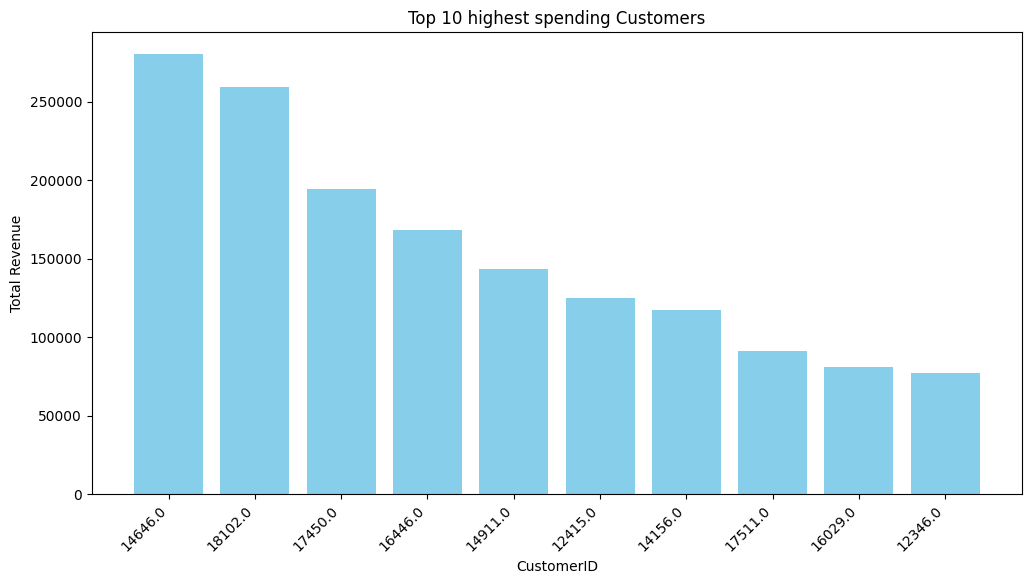

In [72]:
# trying to plot top customers
plt.figure(figsize=(12, 6))
plt.bar(top_customers['CustomerID'].astype(str), top_customers['Total_Revenue'], color='skyblue')

plt.title('Top 10 highest spending Customers')
plt.xlabel('CustomerID')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

plt.show()

**4. Global Product Demand**

In [73]:
# Computing total quantity sold per country
ReatailData_non_UK = RetailData_df[RetailData_df['Country'] != 'United Kingdom']


In [74]:
# Calculating how much is sold per country
country_demand = (
    ReatailData_non_UK.groupby('Country')
    .agg(Total_Quantity = ('Quantity', 'sum'))
    .reset_index()

)

In [75]:
# RANKING countries by demand
country_demand = country_demand.sort_values(
    by='Total_Quantity', 
    ascending=False
).head(10)

country_demand

,Country,Total_Quantity
23,Netherlands,200937
10,EIRE,140383
14,Germany,119156
13,France,111429
0,Australia,84199
31,Sweden,36078
32,Switzerland,30083
30,Spain,27944
19,Japan,26016
3,Belgium,23237


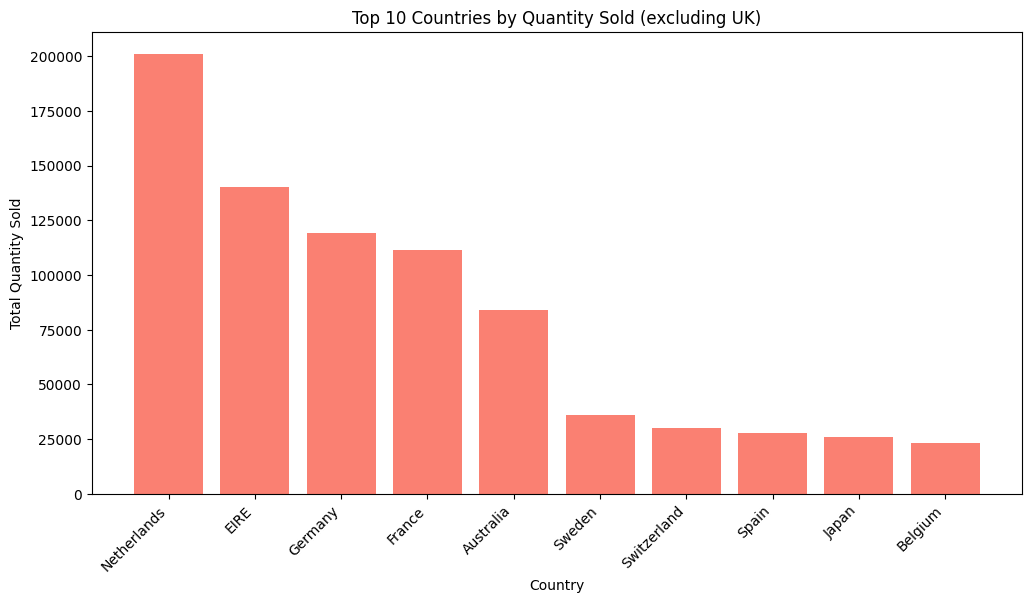

In [76]:
# plotting country demand

top_demand = country_demand.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_demand['Country'], top_demand['Total_Quantity'], color='salmon')

plt.title('Top 10 Countries by Quantity Sold (excluding UK)')
plt.xlabel('Country')
plt.ylabel('Total Quantity Sold')   
plt.xticks(rotation=45, ha='right')

plt.show()